<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Classifications/Titanic%20Dataset%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install -q kaggle

In [17]:
!mkdir -p ~/.kaggle


In [18]:
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [13]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 827kB/s]


In [14]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Extraction 

In [19]:
dataset = pd.read_csv("./train.csv")

In [20]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [22]:
dataset.drop(['Cabin'],inplace = True,axis = 1)

In [23]:
dataset = dataset.sample(frac = 1)

In [24]:
median = dataset['Age'].median()
dataset['Age'] = dataset['Age'].fillna(median)

In [25]:
dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

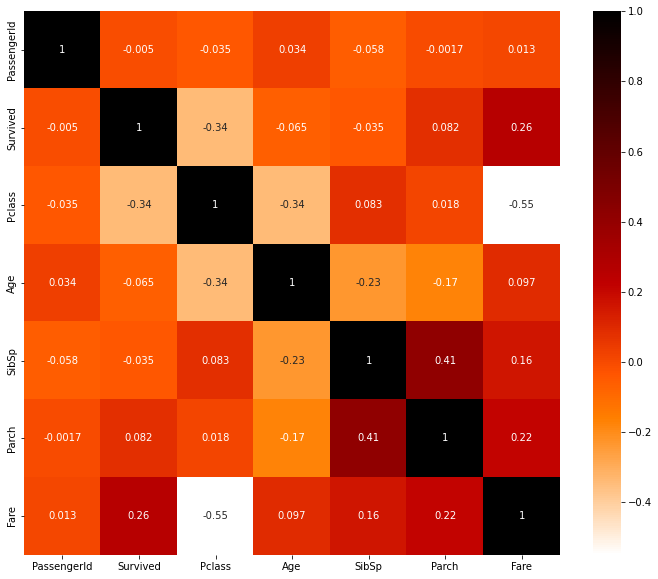

In [26]:
plt.figure(figsize = (12,10))
sns.heatmap(dataset.corr(),cmap = "gist_heat_r",annot = True)

In [27]:
corr_matrix = dataset.corr().abs()
corr_matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
dataset.drop(to_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.005007,0.035144,0.034212,0.057527,0.001652,0.012658
Survived,0.005007,1.000000,0.338481,0.064910,0.035322,0.081629,0.257307
Pclass,0.035144,0.338481,1.000000,0.339898,0.083081,0.018443,0.549500
Age,0.034212,0.064910,0.339898,1.000000,0.233296,0.172482,0.096688
SibSp,0.057527,0.035322,0.083081,0.233296,1.000000,0.414838,0.159651
Parch,0.001652,0.081629,0.018443,0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,0.549500,0.096688,0.159651,0.216225,1.000000


## Model Training

In [29]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,C
792,793,0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.5500,S
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.0500,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,S
...,...,...,...,...,...,...,...,...,...,...,...
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,C
622,623,1,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,C
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,S
450,451,0,2,"West, Mr. Edwy Arthur",male,36.0,1,2,C.A. 34651,27.7500,S


In [30]:
!pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from lazypredict.Supervised import LazyClassifier

In [32]:
x = dataset.drop(['Survived','PassengerId'],axis = 1)
y = dataset['Survived']

In [33]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
842,1,"Serepeca, Miss. Augusta",female,30.00,0,0,113798,31.00,C
792,3,"Sage, Miss. Stella Anna",female,28.00,8,2,CA. 2343,69.55,S
574,3,"Rush, Mr. Alfred George John",male,16.00,0,0,A/4. 20589,8.05,S
869,3,"Johnson, Master. Harold Theodor",male,4.00,1,1,347742,11.13,S
719,3,"Johnson, Mr. Malkolm Joackim",male,33.00,0,0,347062,7.78,S
...,...,...,...,...,...,...,...,...,...
632,1,"Stahelin-Maeglin, Dr. Max",male,32.00,0,0,13214,30.50,C
622,3,"Nakid, Mr. Sahid",male,20.00,1,1,2653,15.74,C
672,2,"Mitchell, Mr. Henry Michael",male,70.00,0,0,C.A. 24580,10.50,S
450,2,"West, Mr. Edwy Arthur",male,36.00,1,2,C.A. 34651,27.75,S


In [34]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['Sex'] = encoder.fit_transform(dataset['Sex'])
dataset['Embarked'] = encoder.fit_transform(dataset['Embarked'])

In [35]:
dataset.drop(['Ticket'],axis = 1,inplace = True)

In [36]:
x = dataset.drop(['Survived','Name'],axis = 1)
y = dataset['Survived']

In [37]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
842,843,1,1,"Serepeca, Miss. Augusta",0,30.00,0,0,31.00,0
792,793,0,3,"Sage, Miss. Stella Anna",0,28.00,8,2,69.55,2
574,575,0,3,"Rush, Mr. Alfred George John",1,16.00,0,0,8.05,2
869,870,1,3,"Johnson, Master. Harold Theodor",1,4.00,1,1,11.13,2
719,720,0,3,"Johnson, Mr. Malkolm Joackim",1,33.00,0,0,7.78,2
...,...,...,...,...,...,...,...,...,...,...
632,633,1,1,"Stahelin-Maeglin, Dr. Max",1,32.00,0,0,30.50,0
622,623,1,3,"Nakid, Mr. Sahid",1,20.00,1,1,15.74,0
672,673,0,2,"Mitchell, Mr. Henry Michael",1,70.00,0,0,10.50,2
450,451,0,2,"West, Mr. Edwy Arthur",1,36.00,1,2,27.75,2


In [38]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
842,843,1,0,30.00,0,0,31.00,0
792,793,3,0,28.00,8,2,69.55,2
574,575,3,1,16.00,0,0,8.05,2
869,870,3,1,4.00,1,1,11.13,2
719,720,3,1,33.00,0,0,7.78,2
...,...,...,...,...,...,...,...,...
632,633,1,1,32.00,0,0,30.50,0
622,623,3,1,20.00,1,1,15.74,0
672,673,2,1,70.00,0,0,10.50,2
450,451,2,1,36.00,1,2,27.75,2


In [39]:
x['Age'] = (x['Age'] - x['Age'].min()) / (x['Age'].max() - x['Age'].min())
x['Fare'] = (x['Fare'] - x['Fare'].min()) / (x['Fare'].max() - x['Fare'].min())


In [40]:
x.drop(['PassengerId'],axis = 1,inplace = True)

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size = 0.2)

In [42]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(x_train, x_val, y_train, y_val)

100%|██████████| 29/29 [00:02<00:00, 13.64it/s]


In [43]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.84,0.82,0.82,0.84,0.09
XGBClassifier,0.83,0.80,0.80,0.83,0.62
SVC,0.82,0.79,0.79,0.81,0.05
NuSVC,0.82,0.79,0.79,0.81,0.06
RandomForestClassifier,0.80,0.79,0.79,0.80,0.29
BaggingClassifier,0.80,0.78,0.78,0.80,0.04
ExtraTreesClassifier,0.79,0.78,0.78,0.79,0.19
LogisticRegression,0.79,0.77,0.77,0.79,0.02
KNeighborsClassifier,0.78,0.76,0.76,0.78,0.03


In [44]:
x.shape

(891, 7)

In [45]:
import tensorflow as tf


In [46]:
tf.random.set_seed(42)

## ANN

In [47]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024,input_shape = (7,),),
    tf.keras.layers.Dense(1024,activation = "relu"),
    tf.keras.layers.Dense(1024,activation = "relu"),
    tf.keras.layers.Dense(1024,activation = "relu"),
    tf.keras.layers.Dense(512,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(512,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
model.compile(loss='binary_crossentropy',optimizer = tf.optimizers.Adam(),metrics = ["accuracy"])

In [48]:
model.fit(x,y,epochs = 120)

Epoch 1/120
28/28 [==============================] - 3s 6ms/step - loss: 0.6130 - accuracy: 0.6240
Epoch 2/120
28/28 [==============================] - 0s 5ms/step - loss: 0.5265 - accuracy: 0.7912
Epoch 3/120
28/28 [==============================] - 0s 5ms/step - loss: 0.5150 - accuracy: 0.7744
Epoch 4/120
28/28 [==============================] - 0s 5ms/step - loss: 0.4875 - accuracy: 0.7868
Epoch 5/120
28/28 [==============================] - 0s 5ms/step - loss: 0.4702 - accuracy: 0.7924
Epoch 6/120
28/28 [==============================] - 0s 5ms/step - loss: 0.4693 - accuracy: 0.8070
Epoch 7/120
28/28 [==============================] - 0s 5ms/step - loss: 0.4831 - accuracy: 0.7935
Epoch 8/120
28/28 [==============================] - 0s 5ms/step - loss: 0.4618 - accuracy: 0.8047
Epoch 9/120
28/28 [==============================] - 0s 5ms/step - loss: 0.4486 - accuracy: 0.8126
Epoch 10/120
28/28 [==============================] - 0s 5ms/step - loss: 0.4496 - accuracy: 0.8092
Epoch 11/

## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
lgsmodel = LogisticRegression()
lgsmodel.fit(x_train,y_train)

LogisticRegression()

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(lgsmodel.predict(x_val),y_val)

0.7821229050279329

## XGBoost

In [51]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
from xgboost import XGBClassifier
xgbooster =  XGBClassifier()
xgbooster.fit(x,y)

XGBClassifier()

## Predictions

In [53]:
test_dataset = pd.read_csv("./test.csv")

In [54]:
test_dataset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [55]:
test_dataset.drop(['Cabin'],axis = 1,inplace = True)

In [56]:
median = test_dataset['Age'].median()
test_dataset['Age'] = test_dataset['Age'].fillna(median)

In [57]:
test_dataset['Fare'] = test_dataset['Fare'].fillna(test_dataset['Fare'].mean())

In [58]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test_dataset['Sex'] = encoder.fit_transform(test_dataset['Sex'])
test_dataset['Embarked'] = encoder.fit_transform(test_dataset['Embarked'])

In [59]:
x_test = test_dataset.drop(['PassengerId','Ticket','Name'],axis = 1)

In [60]:
x_test.shape

(418, 7)

In [61]:
x_test['Age'] = (x_test['Age'] - x_test['Age'].min()) / (x_test['Age'].max() - x_test['Age'].min())
x_test['Fare'] = (x_test['Fare'] - x_test['Fare'].min()) / (x_test['Fare'].max() - x_test['Fare'].min())

In [62]:
y_pred = model.predict(x_test) > 0.5

14/14 [==============================] - 0s 3ms/step


In [63]:
y_pred_0 = []
for i in range(len(y_pred)):
  if y_pred[i]:
    y_pred_0.append(1)
  else:
    y_pred_0.append(0)


In [64]:
y_pred_0

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,


In [65]:
predictions_csv = {"PassengerId":test_dataset['PassengerId'],"Survived":y_pred_0}

In [66]:
df = pd.DataFrame(predictions_csv)
df.to_csv("submission.csv",index = False)

In [67]:
from sklearn import svm

In [68]:
y_pred_xg = xgbooster.predict(x_test)

In [69]:
predictions_csv = {"PassengerId":test_dataset['PassengerId'],"Survived":y_pred_xg}

In [70]:
df = pd.DataFrame(predictions_csv)
df.to_csv("submission_xg.csv",index = False)